In [1]:
import pandas as pd 
import plotly .offline as offline
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc,mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
from time import time
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("ChurnPrediction (1).csv")

In [4]:
print(data['JobRole'].value_counts())

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [74]:
fig1 = go.Figure(
    data=[
        go.Bar(
            name="JobLevel",
            x=dataset["JobRole"],
            y=dataset["JobLevel"],
            offsetgroup=0,
        ),
        go.Bar(
            name="JobSatisfaction",
            x=dataset["JobRole"],
            y=dataset["JobSatisfaction"],
            offsetgroup=1,
        ),
    ],
    layout=go.Layout(
        title="JobLevel v/s JovSatisfaction",
        xaxis_title="JobRole"
    )
)
fig1.show()

In [75]:
import plotly.express as px
fig2 = px.bar(dataset,x = 'JobRole', y= 'MonthlyIncome',title="JobLevel v/s MonthlyIncome")
fig2.show()

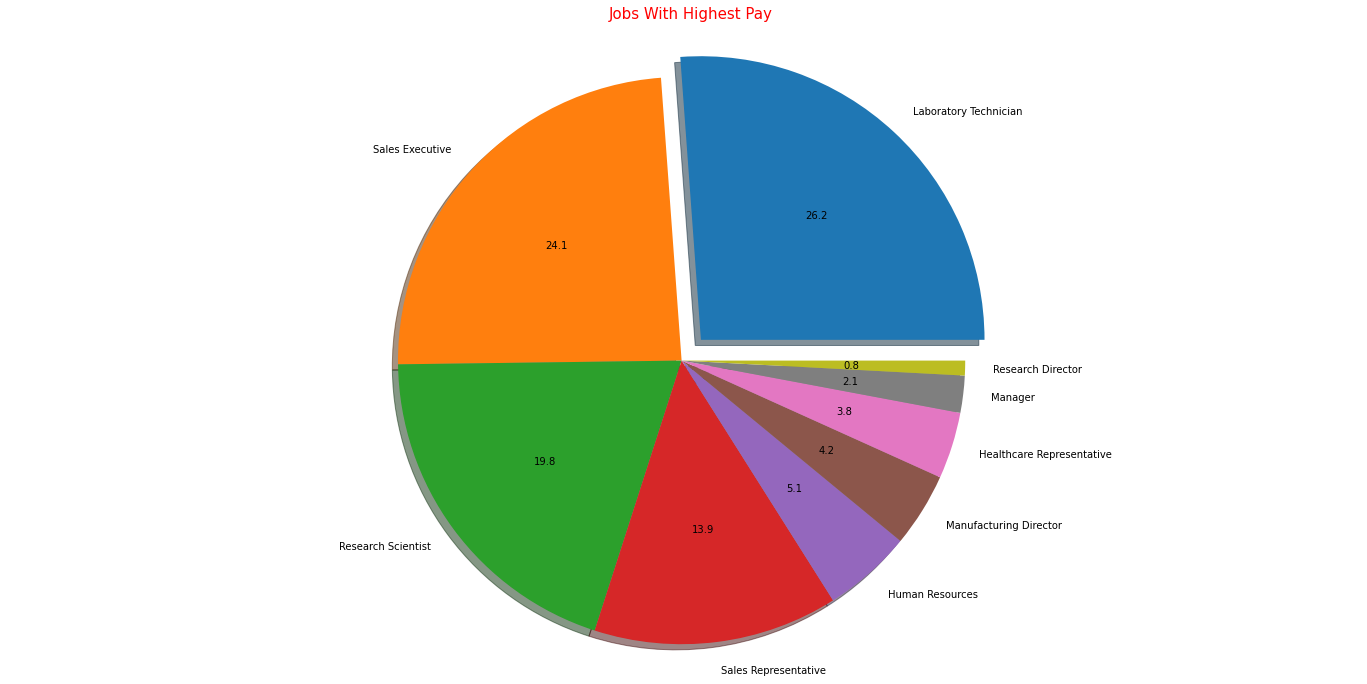

In [5]:
pay = data[(data['PastEmployee'] == 'Yes')]
#Plotting pie chart with respect to order region
total_pay = pay['JobRole'].value_counts().plot.pie(figsize=(24,12),explode=(0.1,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True)
plt.title("Jobs With Highest Pay",size=15,color='r') # Plotting title
plt.ylabel(" ")
total_pay.axis('equal') 
plt.show()


In [8]:
print(dataset['BusinessTravel'].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


In [9]:
print(dataset['Department'].value_counts())

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


In [10]:
print(dataset['EducationField'].value_counts())

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


In [11]:
print(dataset['JobRole'].value_counts())

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [12]:
print(dataset['MaritalStatus'].value_counts())

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


In [13]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

# Converting Categorical Values into Numeric

In [3]:
# Converting Categorical features into Numerical features for binary Object Values(i.e OverTime,PastEmployee,MaritalStatus,Gender)
def converter(column):
    if column == 'Yes':
        return 1
    else:
        return 0
def convertAge(column):
    if column <=39:
        return 1
    else:
        return 0

In [4]:
print(dataset['Age'].value_counts())
dataset['Age']=dataset['Age'].apply(convertAge)
print(dataset['Age'].value_counts())

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
1    948
0    522
Name: Age, dtype: int64


In [5]:
dataset['PastEmployee'] = dataset['PastEmployee'].apply(converter)
dataset['OverTime'] = dataset['OverTime'].apply(converter)
dataset['Gender']=dataset['Gender'].map({'Male':0,'Female':1})

In [17]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

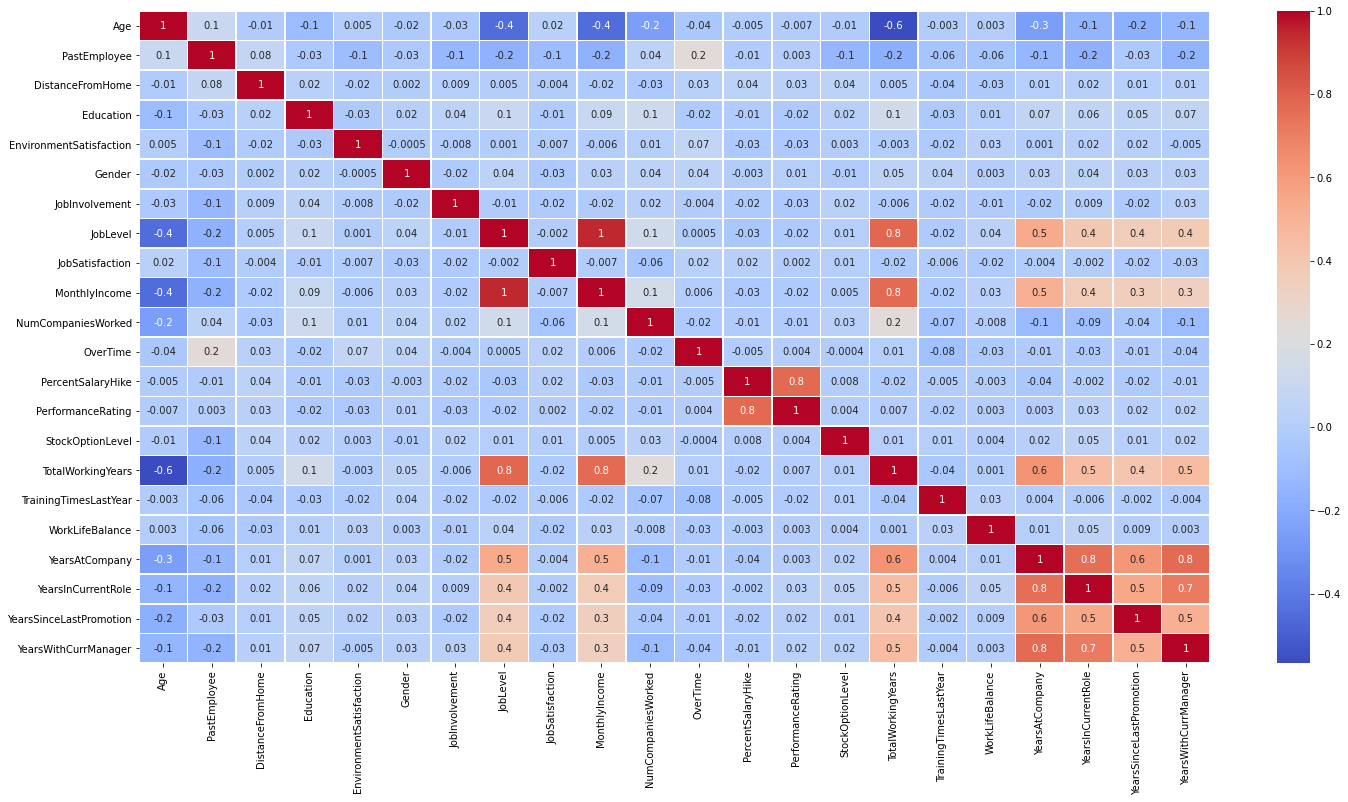

In [62]:
# Plotting Heat Map for checking co-relationship between features
fig, ax = plt.subplots(figsize=(24,12))         # figsize
sns.heatmap(dataset.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm')

In [6]:
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
final_data = pd.get_dummies(dataset, columns = categorical_features)

In [19]:
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   PastEmployee                       1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   JobInvolvement                     1470 non-null   int64
 6   JobLevel                           1470 non-null   int64
 7   JobSatisfaction                    1470 non-null   int64
 8   MonthlyIncome                      1470 non-null   int64
 9   NumCompaniesWorked                 1470 non-null   int64
 10  OverTime                           1470 non-null   int64
 11  PercentSalaryHike                  1470 non-null   int64
 12  PerformanceRating   

In [7]:
# Dividing dataset into label and feature sets
X = final_data.drop('PastEmployee', axis = 1) # Features
Y = final_data['PastEmployee'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1470, 46)
(1470,)


In [8]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [9]:
# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(X_test.shape)

(1029, 46)
(441, 46)


Number of observations in each class before oversampling (training data): 
 0    859
1    170
Name: PastEmployee, dtype: int64


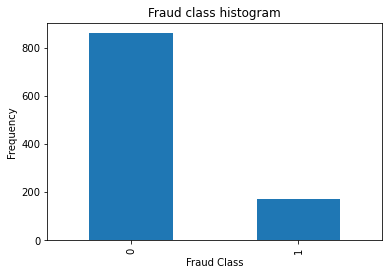

In [10]:
# Implementing Oversampling to balance the dataset; SMOTE stands for Synthetic Minority Oversampling TEchnique
print("Number of observations in each class before oversampling (training data): \n", pd.Series(Y_train).value_counts())

pd.value_counts(pd.Series(Y_train)).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Fraud Class')
plt.ylabel('Frequency')
plt.show()

In [11]:
smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

Number of observations in each class after oversampling (training data): 
 1    859
0    859
Name: PastEmployee, dtype: int64


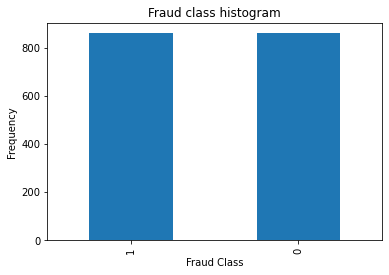

In [12]:
print("Number of observations in each class after oversampling (training data): \n", pd.Series(Y_train).value_counts())
pd.value_counts(pd.Series(Y_train)).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Fraud Class')
plt.ylabel('Frequency')
plt.show()

In [13]:
from xgboost import XGBClassifier 

In [192]:
model = XGBClassifier()

In [193]:
model.fit(X_train, Y_train)

XGBClassifier()

In [194]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [196]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.53%


In [197]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

t1=time()
gsearch1.fit(X_train,Y_train)
print("Predicting time:", round(time()-t1, 3), "s")
best_parameters = gsearch1.best_params_
print(best_parameters)

best_result = gsearch1.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

C:\Users\Tirth\anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



Predicting time: 13.353 s
{'max_depth': 9, 'min_child_weight': 1}
0.9826591503547041


In [198]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

t1=time()
gsearch2.fit(X_train,Y_train)
print("Predicting time:", round(time()-t1, 3), "s")
best_parameters = gsearch2.best_params_
print(best_parameters)

best_result = gsearch2.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

C:\Users\Tirth\anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



Predicting time: 7.265 s
{'max_depth': 6, 'min_child_weight': 5}
0.9789476846975921


In [199]:
param_test2b = {
 'min_child_weight':[1,2,3,4],
    'max_depth':[9,11,13,15],
    'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
t1=time()
gsearch2b.fit(X_train,Y_train)
print("Predicting time:", round(time()-t1, 3), "s")
best_parameters = gsearch2b.best_params_
print(best_parameters)

best_result = gsearch2b.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

C:\Users\Tirth\anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



Predicting time: 98.483 s
{'gamma': 0.0, 'max_depth': 11, 'min_child_weight': 1}
0.9836934537081843


In [200]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import AdaBoostClassifier
n_estimators = [75,80,85,90]
random_grid = {'n_estimators': n_estimators            
               }
pprint(random_grid)
model = AdaBoostClassifier()
rf_random = RandomizedSearchCV(estimator=model, scoring='accuracy', param_distributions=random_grid, n_iter=50, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
t1=time()
rf_random.fit(X_train, Y_train)
print("Predicting time:", round(time()-t1, 3), "s")
print(rf_random.best_params_)
print(rf_random.best_estimator_)
print(rf_random.best_score_)

{'n_estimators': [75, 80, 85, 90]}
Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\Tirth\anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning:

The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    3.1s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.6s finished


Predicting time: 4.178 s
{'n_estimators': 80}
AdaBoostClassifier(n_estimators=80)
0.873150555087728


In [14]:
import lightgbm as lgb
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

In [59]:
max_depth = [int(x) for x in np.linspace(10, 50, num=11)]
max_depth.append(None)
num_leaves=[40,45,50,55]
min_data_in_leaf = [200,300,400,500]
boosting = ['gbdt','rf','dart','goss']
n_estimators = [100,120,140,160]
learning_rate = [0.002,0.003,0.004,0.005]
random_grid = {'max_bin' : max_bin,
               'learning_rate' : learning_rate,
               'n_estimators'  : n_estimators,
               'num_leaves'    : num_leaves,
               'max_depth'     : max_depth,
               'boosting'      : boosting
               }
pprint(random_grid)
model = lgb.LGBMClassifier()
lgb_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=50, cv=3,
                               verbose=2, n_jobs=-1)
t1=time()
lgb_random.fit(X_train, Y_train)
print("Predicting time:", round(time()-t1, 3), "s")
print(lgb_random.best_params_)
print(lgb_random.best_estimator_)
print(lgb_random.best_score_)

{'boosting': ['gbdt', 'rf', 'dart', 'goss'],
 'learning_rate': [0.002, 0.003, 0.004, 0.005],
 'max_bin': [300, 400, 500, 600],
 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None],
 'n_estimators': [100, 120, 140, 160],
 'num_leaves': [40, 45, 50, 55]}
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.7s finished


Predicting time: 12.632 s
{'num_leaves': 45, 'n_estimators': 160, 'max_depth': 38, 'max_bin': 400, 'learning_rate': 0.005, 'boosting': 'gbdt'}
LGBMClassifier(boosting='gbdt', learning_rate=0.005, max_bin=400, max_depth=38,
               n_estimators=160, num_leaves=45)
0.8661585651114447


# Fitting the model's to training set using Hyperparameter's  

training time: 0.619 s
Predicting time: 0.004 s
Model paramters used are : XGBClassifier(gamma=0.0, max_depth=11)
Accuracy of fraud status is        : 87.75510204081633 %
Recall score of fraud status is    : 65.85365853658537 %
F1 score of fraud status is        : 50.0 %
LGBM AUCROC                        : 68.27759597733258 %
Confusion matrix: 

TP:  27
TN:  360
FP:  14
FN:  40
OverTime                             0.255203
JobLevel                             0.087756
JobRole_Sales Executive              0.071910
StockOptionLevel                     0.039640
EducationField_Technical Degree      0.036097
MaritalStatus_Single                 0.033536
Age                                  0.033140
YearsWithCurrManager                 0.027321
BusinessTravel_Travel_Frequently     0.026940
JobSatisfaction                      0.025005
NumCompaniesWorked                   0.021918
JobInvolvement                       0.018550
BusinessTravel_Travel_Rarely         0.017538
EducationField_Marke

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

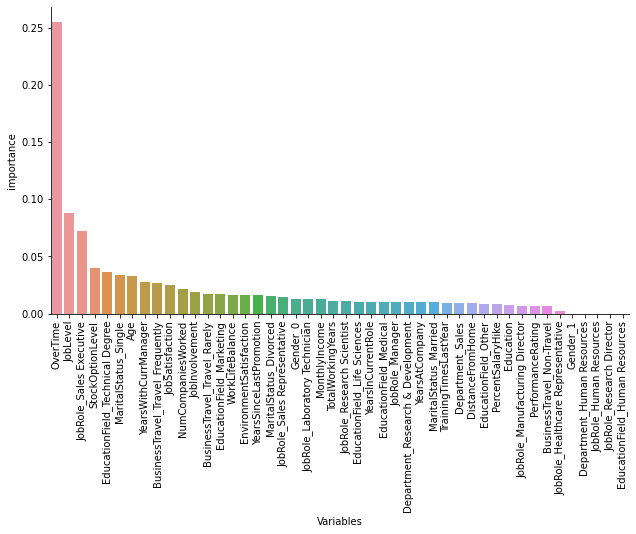

In [15]:
XGModel = XGBClassifier(gamma = 0.0, max_depth = 11, min_child_weight = 1)
t0=time()
XGModel=XGModel.fit(X_train,Y_train) # Fitting train data for fraud detection
print("training time:", round(time()-t0, 3), "s")
t1=time()
XGModel_y_pred=XGModel.predict(X_test)
print("Predicting time:", round(time()-t1, 3), "s")
XGModel_accuracy=accuracy_score(XGModel_y_pred, Y_test) #Accuracy for fraud detection
XGModel_recall=recall_score(XGModel_y_pred, Y_test) #Recall score for  fraud detection
XGModel_conf=confusion_matrix(Y_test, XGModel_y_pred)# fraud detection
XGModel_f1=f1_score(Y_test, XGModel_y_pred)#fraud detection
XGModel_auc=roc_auc_score(Y_test,XGModel_y_pred)
XGModel_fpr,XGModel_tpr, _ =roc_curve(Y_test,XGModel_y_pred)
print('Model paramters used are :',XGModel)
print('Accuracy of fraud status is        :', (XGModel_accuracy)*100,'%')
print('Recall score of fraud status is    :', (XGModel_recall)*100,'%')
print('F1 score of fraud status is        :', (XGModel_f1)*100,'%')
print('LGBM AUCROC                        :', (XGModel_auc)*100,'%')
print('Confusion matrix: \n')
print('TP: ', XGModel_conf[1, 1])
print('TN: ', XGModel_conf[0, 0])
print('FP: ', XGModel_conf[0, 1])
print('FN: ', XGModel_conf[1, 0])

#to print important features

featimp = pd.Series(XGModel.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

#vizulization of important features
important_col=XGModel.feature_importances_.argsort()
feat_imp=pd.DataFrame({'Variables':X.columns[important_col],'importance':XGModel.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='Variables', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

training time: 0.269 s
Predicting time: 0.003 s
Model paramters used are : AdaBoostClassifier(n_estimators=80)
Accuracy of fraud status is        : 87.75510204081633 %
Recall score of fraud status is    : 65.85365853658537 %
F1 score of fraud status is        : 50.0 %
LGBM AUCROC                        : 68.27759597733258 %
Confusion matrix: 

TP:  27
TN:  360
FP:  14
FN:  40
WorkLifeBalance                      0.0875
TrainingTimesLastYear                0.0875
YearsAtCompany                       0.0750
StockOptionLevel                     0.0625
YearsWithCurrManager                 0.0625
YearsSinceLastPromotion              0.0500
JobInvolvement                       0.0500
MonthlyIncome                        0.0500
EnvironmentSatisfaction              0.0375
NumCompaniesWorked                   0.0375
TotalWorkingYears                    0.0375
Age                                  0.0250
PercentSalaryHike                    0.0250
OverTime                             0.0250
JobSa

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

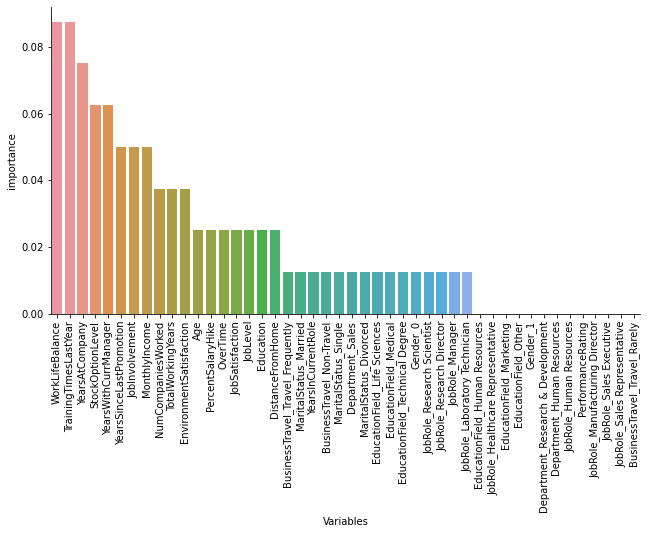

In [16]:
from sklearn.ensemble import AdaBoostClassifier
AdaModel = AdaBoostClassifier(n_estimators = 80)
t0=time()
AdaModel=AdaModel.fit(X_train,Y_train) # Fitting train data for fraud detection
print("training time:", round(time()-t0, 3), "s")
t1=time()
AdaModel_y_pred=XGModel.predict(X_test)
print("Predicting time:", round(time()-t1, 3), "s")
AdaModel_accuracy=accuracy_score(AdaModel_y_pred, Y_test) #Accuracy for fraud detection
AdaModel_recall=recall_score(AdaModel_y_pred, Y_test) #Recall score for  fraud detection
AdaModel_conf=confusion_matrix(Y_test, AdaModel_y_pred)# fraud detection
AdaModel_f1=f1_score(Y_test, AdaModel_y_pred)#fraud detection
AdaModel_auc=roc_auc_score(Y_test,AdaModel_y_pred)
AdaModel_fpr,AdaModel_tpr, _ =roc_curve(Y_test,AdaModel_y_pred)
print('Model paramters used are :',AdaModel)
print('Accuracy of fraud status is        :', (AdaModel_accuracy)*100,'%')
print('Recall score of fraud status is    :', (AdaModel_recall)*100,'%')
print('F1 score of fraud status is        :', (AdaModel_f1)*100,'%')
print('LGBM AUCROC                        :', (AdaModel_auc)*100,'%')
print('Confusion matrix: \n')
print('TP: ', AdaModel_conf[1, 1])
print('TN: ', AdaModel_conf[0, 0])
print('FP: ', AdaModel_conf[0, 1])
print('FN: ', AdaModel_conf[1, 0])
#to print important features

featimp = pd.Series(AdaModel.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

#vizulization of important features
important_col=AdaModel.feature_importances_.argsort()
feat_imp=pd.DataFrame({'Variables':X.columns[important_col],'importance':AdaModel.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='Variables', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

training time: 0.627 s
Predicting time: 0.002 s
Model paramters used are : LGBMClassifier(boosting='gbdt', learning_rate=0.005, max_bin=400, max_depth=38,
               n_estimators=160, num_leaves=45)
Accuracy of fraud status is        : 84.58049886621315 %
Recall score of fraud status is    : 49.18032786885246 %
F1 score of fraud status is        : 46.875 %
LGBM AUCROC                        : 68.24367467475456 %
Confusion matrix: 

TP:  30
TN:  343
FP:  31
FN:  37
JobSatisfaction                      576
StockOptionLevel                     546
NumCompaniesWorked                   508
MaritalStatus_Single                 331
DistanceFromHome                     326
YearsSinceLastPromotion              323
OverTime                             320
MonthlyIncome                        306
WorkLifeBalance                      303
PercentSalaryHike                    297
Education                            266
YearsWithCurrManager                 260
EnvironmentSatisfaction            

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

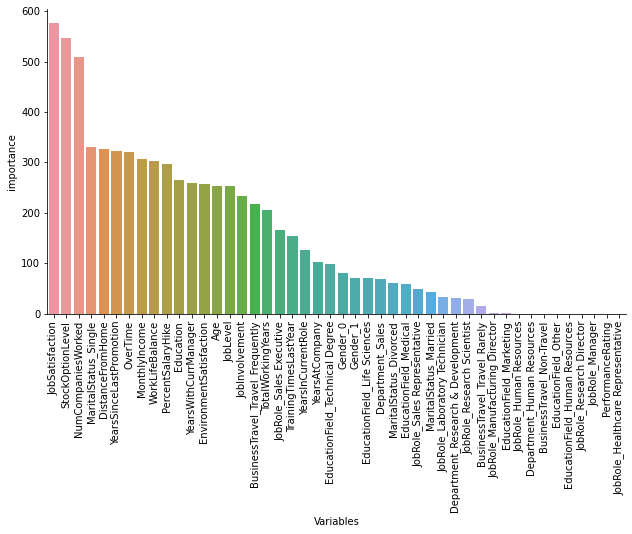

In [17]:
import lightgbm as lgb
LGBModel = lgb.LGBMClassifier(boosting='gbdt', learning_rate=0.005, max_bin=400, max_depth=38,
               n_estimators=160, num_leaves=45)
t0=time()
LGBModel=LGBModel.fit(X_train,Y_train) # Fitting train data for fraud detection
print("training time:", round(time()-t0, 3), "s")
t1=time()
LGBModel_y_pred=LGBModel.predict(X_test)
print("Predicting time:", round(time()-t1, 3), "s")
LGBModel_accuracy=accuracy_score(LGBModel_y_pred, Y_test) #Accuracy for fraud detection
LGBModel_recall=recall_score(LGBModel_y_pred, Y_test) #Recall score for  fraud detection
LGBModel_conf=confusion_matrix(Y_test, LGBModel_y_pred)# fraud detection
LGBModel_f1=f1_score(Y_test, LGBModel_y_pred)#fraud detection
LGBModel_auc=roc_auc_score(Y_test,LGBModel_y_pred)
LGBModel_fpr,LGBModel_tpr, _ =roc_curve(Y_test,LGBModel_y_pred)
print('Model paramters used are :',LGBModel)
print('Accuracy of fraud status is        :', (LGBModel_accuracy)*100,'%')
print('Recall score of fraud status is    :', (LGBModel_recall)*100,'%')
print('F1 score of fraud status is        :', (LGBModel_f1)*100,'%')
print('LGBM AUCROC                        :', (LGBModel_auc)*100,'%')
print('Confusion matrix: \n')
print('TP: ', LGBModel_conf[1, 1])
print('TN: ', LGBModel_conf[0, 0])
print('FP: ', LGBModel_conf[0, 1])
print('FN: ', LGBModel_conf[1, 0])
#to print important features

featimp = pd.Series(LGBModel.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

#vizulization of important features
important_col=LGBModel.feature_importances_.argsort()
feat_imp=pd.DataFrame({'Variables':X.columns[important_col],'importance':LGBModel.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='Variables', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

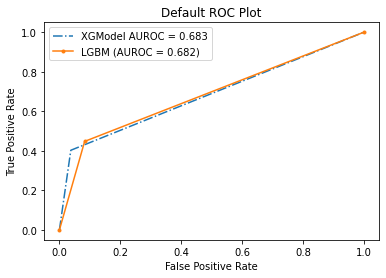

In [22]:
plt.plot(XGModel_fpr, XGModel_tpr, linestyle='-.', label='XGModel AUROC = %.3f' % XGModel_auc)
#plt.plot(AdaModel_fpr, AdaModel_tpr, marker='.', label='AdaBoost (AUROC = %0.3f)' % AdaModel_auc)
plt.plot(LGBModel_fpr, LGBModel_tpr, marker='.', label='LGBM (AUROC = %0.3f)' % LGBModel_auc)

# Title
plt.title('Default ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend()
# Show plot
plt.show()


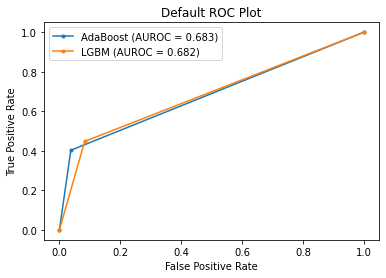

In [23]:
#plt.plot(XGModel_fpr, XGModel_tpr, linestyle='-.', label='XGModel AUROC = %.3f' % XGModel_auc)
plt.plot(AdaModel_fpr, AdaModel_tpr, marker='.', label='AdaBoost (AUROC = %0.3f)' % AdaModel_auc)
plt.plot(LGBModel_fpr, LGBModel_tpr, marker='.', label='LGBM (AUROC = %0.3f)' % LGBModel_auc)

# Title
plt.title('Default ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
# Show plot
plt.show()


We can see overlapping of lines due to same value of XGBoost and AdaBoost Classifier

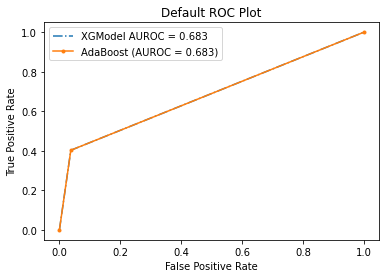

In [24]:
plt.plot(XGModel_fpr, XGModel_tpr, linestyle='-.', label='XGModel AUROC = %.3f' % XGModel_auc)
plt.plot(AdaModel_fpr, AdaModel_tpr, marker='.', label='AdaBoost (AUROC = %0.3f)' % AdaModel_auc)
#plt.plot(LGBModel_fpr, LGBModel_tpr, marker='.', label='LGBM (AUROC = %0.3f)' % LGBModel_auc)

# Title
plt.title('Default ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 
# Show plot
plt.show()
